Three trend for this project:
1. total fare and average rides overall has negative relationship
2. urban area has the largest percentage of total fare, total driver and total rides
3. rural area has the most spread data

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import csv

In [2]:
city = os.path.join('raw_data/city_data.csv')
ride = os.path.join('raw_data/ride_data.csv')

df_city = pd.read_csv(city)
df_ride = pd.read_csv(ride)

#see city info
df_city.head()

,city,driver_count,type
0,Kelseyland,63,Urban
1,Nguyenbury,8,Urban
2,East Douglas,12,Urban
3,West Dawnfurt,34,Urban
4,Rodriguezburgh,52,Urban


In [3]:
#see ride info
df_ride.head()

,city,date,fare,ride_id
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038
1,South Roy,2016-01-02 18:42:34,17.49,4036272335942
2,Wiseborough,2016-01-21 17:35:29,44.18,3645042422587
3,Spencertown,2016-07-31 14:53:22,6.87,2242596575892
4,Nguyenbury,2016-07-09 04:42:44,6.28,1543057793673


In [4]:
# merge dataframes
df_merged = pd.merge(df_city, df_ride, how = 'left')
df_merged.head()

,city,driver_count,type,date,fare,ride_id
0,Kelseyland,63,Urban,2016-08-19 04:27:52,5.51,6246006544795
1,Kelseyland,63,Urban,2016-04-17 06:59:50,5.54,7466473222333
2,Kelseyland,63,Urban,2016-05-04 15:06:07,30.54,2140501382736
3,Kelseyland,63,Urban,2016-01-25 20:44:56,12.08,1896987891309
4,Kelseyland,63,Urban,2016-08-09 18:19:47,17.91,8784212854829


In [5]:
#finding the avrg fare per city
avg_fare = df_merged.groupby('city')['fare'].mean()

#finding ride per city
ride_per_city = df_merged.groupby('city')['ride_id'].count()

#finding the number of drivers per city
total_fare = df_merged.groupby('city')['fare'].sum()

#city type
city_type = df_merged.groupby('city')['driver_count','type']
unique_city = pd.DataFrame({'city':avg_fare.index,
                                'Average Fare':avg_fare.values,
                                'Rides per City':ride_per_city.values,
                                'Total Fare':total_fare.values,
                           })
unique_city_df = unique_city[['city','Total Fare', 'Average Fare', 'Rides per City']]




In [6]:
#mergening to DFs based on common column city
unique_city_df = pd.merge(unique_city_df, df_city, how='outer', on='city')
unique_city_df.head()

,city,Total Fare,Average Fare,Rides per City,driver_count,type
0,Alvarezhaven,741.79,23.928710,31,21,Urban
1,Alyssaberg,535.85,20.609615,26,67,Urban
2,Anitamouth,335.84,37.315556,9,16,Suburban
3,Antoniomouth,519.75,23.625000,22,21,Urban
4,Aprilchester,417.65,21.981579,19,49,Urban


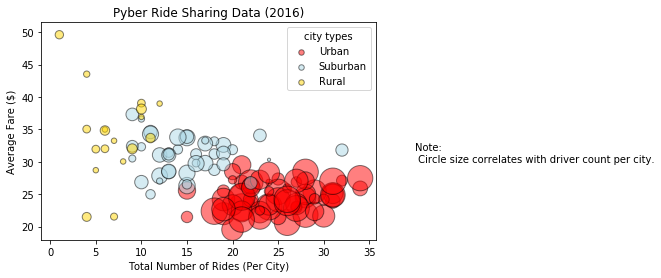

In [7]:
group_city = df_merged.groupby(['city'])
average_fare = group_city['fare'].mean()
total_rides = group_city['ride_id'].nunique()
total_drivers = group_city['driver_count'].max()
city_type = group_city['type'].max()
summary_city = pd.DataFrame({'Average Fare ($)': average_fare,
                          'Total Number of Rides': total_rides,
                          'Total Number of Drivers': total_drivers,
                          'City Type': city_type})
# Urban
urban = summary_city.loc[summary_city['City Type'] == 'Urban']
rides_urban = urban['Total Number of Rides']
avg_fare_urban = urban['Average Fare ($)']
drivers_urban = urban['Total Number of Drivers']

# Suburban
suburban = summary_city.loc[summary_city['City Type'] == 'Suburban']
rides_suburban = suburban['Total Number of Rides']
avg_fare_suburban = suburban['Average Fare ($)']
drivers_suburban = suburban['Total Number of Drivers']

# Rural
rural = summary_city.loc[summary_city['City Type'] == 'Rural']
rides_rural = rural['Total Number of Rides']
avg_fare_rural = rural['Average Fare ($)']
drivers_rural = rural['Total Number of Drivers']

urban_plot = plt.scatter(rides_urban, avg_fare_urban, s=drivers_urban*10, 
                         color='red', alpha=0.5, edgecolor='black', linewidths=1, 
                         label='Urban')
suburban_plot = plt.scatter(rides_suburban, avg_fare_suburban, s=drivers_suburban*10, 
                            color='lightblue', alpha=0.5, edgecolor='black',linewidths=1, 
                            label='Suburban')
rural_plot = plt.scatter(rides_rural, avg_fare_rural, s=drivers_rural*10, 
                         color='gold', alpha=0.5, edgecolor='black',linewidths=1, 
                         label='Rural')

lgnd = plt.legend(handles=[urban_plot,suburban_plot,rural_plot], loc ='best',title = 'city types')
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]

plt.title('Pyber Ride Sharing Data (2016)')
plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fare ($)')

txt="Note:\n Circle size correlates with driver count per city."
plt.text(40, 30, txt, ha='left')


plt.show()

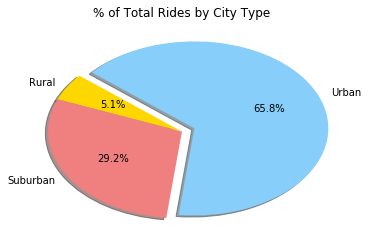

In [8]:
#sum of total rides
total_rides = unique_city_df.groupby('type')['Rides per City', 'driver_count'].sum()
#by city type
rural_ride = total_rides.loc['Rural'][0]
suburban_ride = total_rides.loc['Suburban'][0]
urban_ride = total_rides.loc['Urban'][0]

#ploting
plt.title('% of Total Rides by City Type')
labels = ["Rural", "Suburban", "Urban"]
sizes = [rural_ride, suburban_ride, urban_ride]
colors = ["gold", "lightcoral", "lightskyblue"]
explode = [0, 0, 0.1]

plt.pie(sizes, labels=labels, colors=colors, explode=explode,
        autopct="{0:1.1f}%".format, shadow=True, startangle=140)
plt.show()

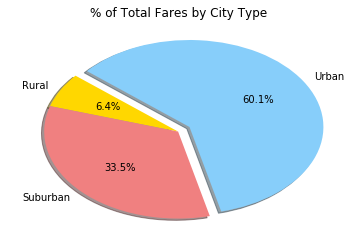

In [11]:
total_fare_sum = unique_city_df.groupby('type')['Total Fare', 'Average Fare'].sum()
rural_fare = total_fare_sum.loc['Rural'][0]
suburban_fare = total_fare_sum.loc['Suburban'][0]
urban_fare = total_fare_sum.loc['Urban'][0]

#ploting
plt.title('% of Total Fares by City Type')
labels = ["Rural", "Suburban", "Urban"]
sizes = [rural_fare, suburban_fare, urban_fare]
colors = ["gold", "lightcoral", "lightskyblue"]
explode = [0, 0, 0.1]


plt.pie(sizes, labels=labels, colors=colors, explode=explode,
        autopct="{0:1.1f}%".format, shadow=True, startangle=140)

plt.show()

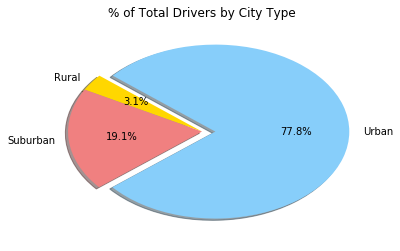

In [12]:
#by city type
rural_drivers = total_rides.loc['Rural'][1]
suburban_drivers = total_rides.loc['Suburban'][1]
urban_drivers = total_rides.loc['Urban'][1]

#ploting
plt.title('% of Total Drivers by City Type')
labels = ["Rural", "Suburban", "Urban"]
sizes = [rural_drivers, suburban_drivers, urban_drivers]
colors = ["gold", "lightcoral", "lightskyblue"]
explode = [0, 0, 0.1]

plt.pie(sizes, labels=labels, colors=colors, explode=explode,
        autopct="{0:1.1f}%".format, shadow=True, startangle=140)
plt.show()